In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Libro1.xls")
df["Year"] = (df["Year"].str.extract('(\d+)')).astype(int)
df.fillna(0,inplace=True)
df["Eficiency Medellin"] = np.where(df["Year"] < 1995,
                                    ((df["Winner Medellin"]*2+df["Draws Medellin"]*1)/((df["Winner Medellin"]+df["Draws Medellin"] +df["Loss Medellin"])*2)),
                                    ((df["Winner Medellin"]*3+df["Draws Medellin"]*1)/((df["Winner Medellin"]+df["Draws Medellin"] +df["Loss Medellin"])*3)))
df["Eficiency Nacional"] = np.where(df["Year"] < 1995,
                                    ((df["Winner Nacional"]*2+df["Draws Nacional"]*1)/((df["Winner Nacional"]+df["Draws Nacional"] +df["Loss Nacional"])*2)),
                                    ((df["Winner Nacional"]*3+df["Draws Nacional"]*1)/((df["Winner Nacional"]+df["Draws Nacional"] +df["Loss Nacional"])*3)))
df.fillna(df["Eficiency Medellin"].mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [3]:
df.head()

,Year,Winner Medellin,Draws Medellin,Loss Medellin,Winner Nacional,Draws Nacional,Loss Nacional,Eficiency Medellin,Eficiency Nacional
0,1948,7.0,3.0,8.0,7,4,7,0.472222,0.500000
1,1949,12.0,5.0,9.0,8,8,10,0.557692,0.461538
2,1950,15.0,4.0,11.0,6,4,20,0.566667,0.266667
3,1951,6.0,7.0,21.0,7,9,18,0.279412,0.338235
4,1952,0.0,0.0,0.0,5,7,16,0.499147,0.303571


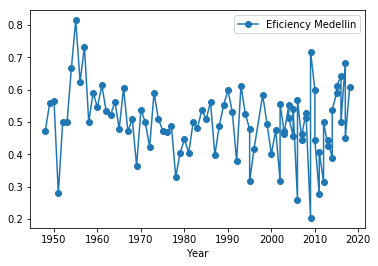

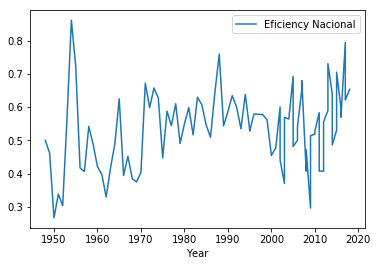

In [4]:
df.plot(kind="line",x="Year",y="Eficiency Medellin",style="-o")
df.plot(kind="line",x="Year",y="Eficiency Nacional")
plt.show()

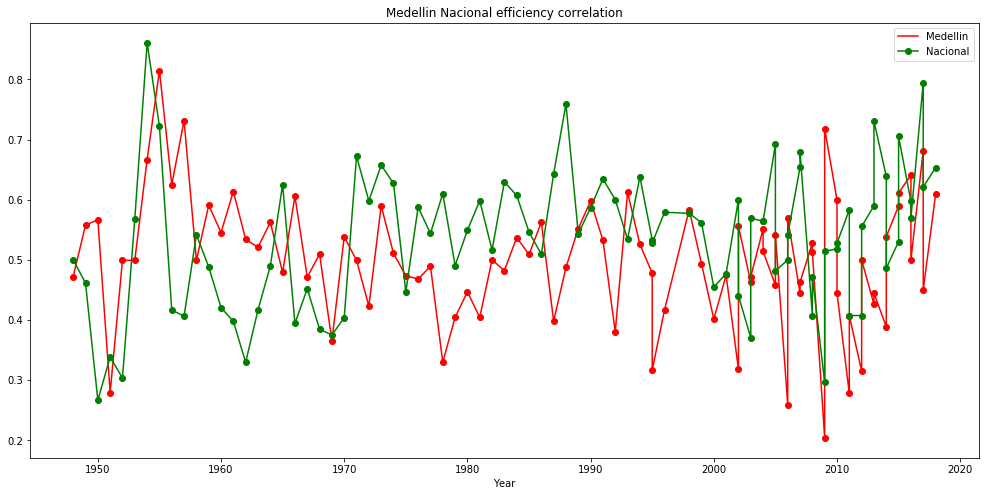

In [7]:
ax = df.plot(kind="line", x="Year",y="Eficiency Medellin", color="r", label="Medellin",style="-o",figsize=(17,8),title="Medellin Nacional efficiency correlation")
df.plot(kind="line",x="Year",y="Eficiency Nacional", color="g", label="Nacional", ax=ax,style="-o")
plt.show()

In [6]:
df.corr()

,Year,Winner Medellin,Draws Medellin,Loss Medellin,Winner Nacional,Draws Nacional,Loss Nacional,Eficiency Medellin,Eficiency Nacional
Year,1.000000,-0.232435,-0.158467,-0.212403,-0.074147,-0.238107,-0.570855,-0.190664,0.285991
Winner Medellin,-0.232435,1.000000,0.641948,0.426594,0.364358,0.467164,0.487550,0.547649,-0.042227
Draws Medellin,-0.158467,0.641948,1.000000,0.680722,0.622233,0.731343,0.584899,-0.045044,-0.008545
Loss Medellin,-0.212403,0.426594,0.680722,1.000000,0.521562,0.611964,0.636818,-0.415737,-0.113105
Winner Nacional,-0.074147,0.364358,0.622233,0.521562,1.000000,0.630966,0.239533,-0.056244,0.556228
Draws Nacional,-0.238107,0.467164,0.731343,0.611964,0.630966,1.000000,0.420574,-0.068655,0.098232
Loss Nacional,-0.570855,0.487550,0.584899,0.636818,0.239533,0.420574,1.000000,-0.085087,-0.564926
Eficiency Medellin,-0.190664,0.547649,-0.045044,-0.415737,-0.056244,-0.068655,-0.085087,1.000000,0.158521
Eficiency Nacional,0.285991,-0.042227,-0.008545,-0.113105,0.556228,0.098232,-0.564926,0.158521,1.000000
